# Import

In [61]:
import pandas as pd
import numpy as np

import warnings

## Load the data

In [3]:
df = pd.read_csv(r'F:\For work\Data set\Mall_Customers.csv')

In [4]:
#Check shape of data set
print("Shape of data set: ", df.shape)

#Check the data type of the columns
print("\nData type of the columns: ", df.dtypes)
print(df.dtypes)

#check for missing value
print('\nMissing value: ', df.isnull().sum())
print(df.isnull().sum())

#Get summary of the numerical  columns
df.describe().astype(int)

Shape of data set:  (200, 5)

Data type of the columns:  CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing value:  CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


## Summary of data set

The data set has none missing value !!!

The data set have 200 rows and 5 columns consists of CustomerID, Age, Annaul income(k$), Spending Score(1-100)

The data types are not in corrected format need to change the Data Types to the correct format


In [10]:
## Schema of the Dataset

schema_before_validate = pd.DataFrame(df.dtypes, columns=['Data Type'])

schema_before_validate

,Data Type
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [11]:
df['CustomerID'] = df['CustomerID'].astype('object') 

In [12]:
schema_after_validate = pd.DataFrame(df.dtypes, columns=['Data Type'])

schema_after_validate

,Data Type
CustomerID,object
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


# Customer Features Distribution

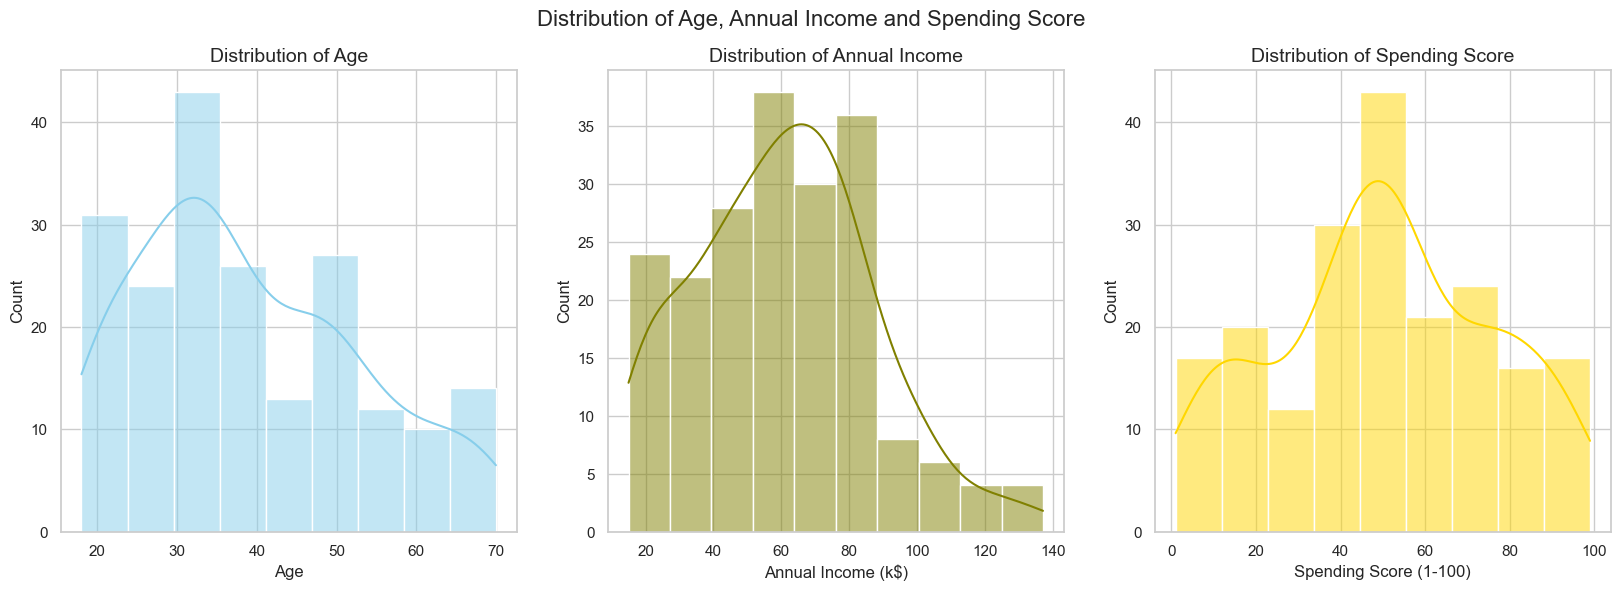

In [5]:
# Customer Features Distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

fig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns.histplot(df['Age'], kde = True, color = 'skyblue', ax = ax[0])
sns.histplot(df['Annual Income (k$)'], kde = True, color = 'olive', ax = ax[1])
sns.histplot(df['Spending Score (1-100)'], kde = True, color = 'gold', ax = ax[2])

#Set the title for each plot
ax[0].set_title('Distribution of Age', fontsize = 14)
ax[1].set_title('Distribution of Annual Income', fontsize = 14)
ax[2].set_title('Distribution of Spending Score', fontsize = 14)

#set the title for the whole plot
fig.suptitle('Distribution of Age, Annual Income and Spending Score', fontsize = 16)

plt.show()

In [15]:
# Acess the fig object and get the summary of the numerical columns

fig_summary = pd.DataFrame(df.describe().T)

fig_summary

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


## Observation

In <u>3 Numerical Columns</u> these are observation from the plot

Within <b>200</b> sample datapoint:

<b>Age:</b> Ranging from <u>18.0 to 70.0</u>, with a mean of <u>38.85</u>, a standard deviation of <u>13.96</u>, and the 25th, 50th, and 75th percentiles being <u>28.75, 36.0, and 49.0,</u> respectively.

<b>Annual Income (k$):</b> Ranging from <u>$15,000 to $137,000</u>, with a mean of <u>$60.56</u>, a standard deviation of <u>$26.26</u>, and the 25th, 50th, and 75th percentiles being <u>$41,500, $61,500, and $78,000,</u> respectively.

<b>Spending Score (1-100):</b> Ranging from <u>1.0 to 99.0</u>, with a mean of <u>50.20</u>, a standard deviation of <u>25.82</u>, and the 25th, 50th, and 75th percentiles being <u>34.75, 50.0, and 73.0,</u> respectively.

## Clustering Analysis

### Elbow Method

This is typically use for cluster analysis, specifically for determining the optimal number of clusters in a dataset, หรือ พูดได้ว่าหาจำนวย Cluster ที่เหมาะสมที่สุดของ Data points ใน Data set นั้นๆ

In [16]:
# Machine Learning libraries import 
from sklearn.cluster import KMeans

In [17]:
# Select the features to use for clustering, we selected by using numerical columns
# Age = number of age in years
# Annual Income = number of dollars
# Spending Score = range of number from 1 to 100, this are already normalized

features = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

After selected features, then we will apply the K-Mean clustering and use the <b>WCSS [Within-Cluster Sum of Squares]</b> a metric where it's commonly use in the Elbow Method for determining the optimal number of clusters in a dataset

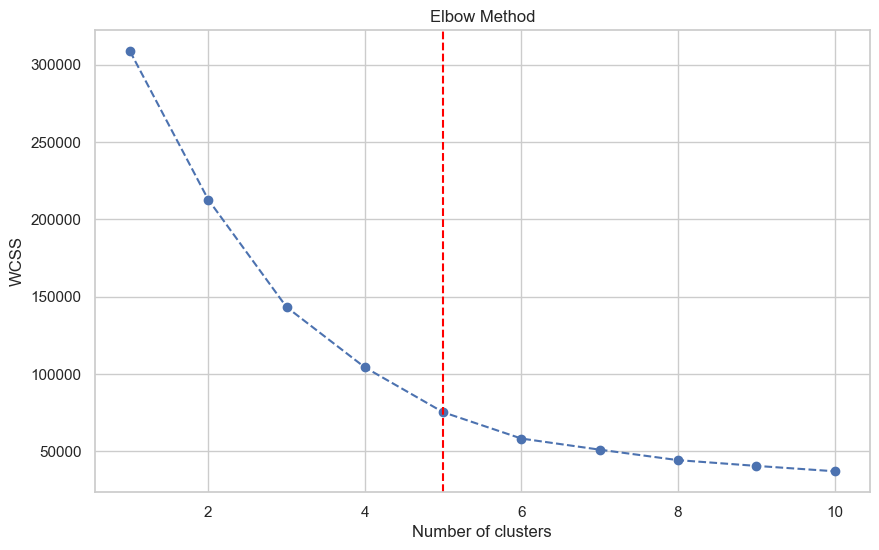

In [70]:
# Determine the optimal number of clusters using elbow method
wcss = [] # Within cluster sum of squares, มันคือ metric ที่ใช้สำหรับ sum square ระหว่างจุดกลุ่มกับจุดกลุ่มอื่นๆ ที่อยู่ในกลุ่มเดียวกัน หรือในคำอื่นคือ ค่าที่ใช้วัดระยะห่างระหว่างจุดกลุ่มกับจุดกลุ่มอื่นๆ ที่อยู่ในกลุ่มเดียวกัน
for i in range(1,11): # 1-11 คือจำนวน cluster ที่เราต้องการทดสอบ 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) #n_init คือจำนวนครั้งที่เราจะทดลองเริ่มต้นการทำ k-means โดยเริ่มจากจุดเริ่มต้นที่แตกต่างกัน
    kmeans.fit(features)
    wcss.append(kmeans.inertia_) # inertia_ คือค่า wcss ที่เราคำนวณได้จากการทำ k-means โดยจะเก็บค่า wcss ไว้ใน list wcss ที่เราสร้างขึ้นมา

# Plot the elbow graph
plt.figure(figsize = (10, 6))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#Add a vertical line at the optimal number of clusters
plt.axvline(x = 5, color = 'red', linestyle = '--')
plt.show()

In [37]:
# Acess the wcss list and number of clusters and turn it into a dataframe

elbow_summary = pd.DataFrame({'Number of Clusters': range(1,11), 'WCSS': wcss})

elbow_summary

,Number of Clusters,WCSS
0,1,308812.780000
1,2,212840.169821
2,3,143342.751572
3,4,104366.151456
4,5,75350.779172
5,6,58300.443322
6,7,51116.986945
7,8,44342.317393
8,9,40623.365472
9,10,37153.672128


In [38]:
# Calculate the difference in WCSS between each cluster, the smaller the difference the better score to choose the number of clusters
change = np.diff(wcss)
change = np.insert(change, 0, np.nan)

change

array([            nan, -95972.61017903, -69497.41824927, -38976.60011614,
       -29015.37228307, -17050.3358509 ,  -7183.45637696,  -6774.66955122,
        -3718.95192129,  -3469.6933445 ])

In [39]:
elbow_summary = pd.concat([elbow_summary, pd.Series(change, name = 'Change in WCSS')], axis = 1)

elbow_summary

,Number of Clusters,WCSS,Change in WCSS
0,1,308812.780000,NaN
1,2,212840.169821,-95972.610179
2,3,143342.751572,-69497.418249
3,4,104366.151456,-38976.600116
4,5,75350.779172,-29015.372283
5,6,58300.443322,-17050.335851
6,7,51116.986945,-7183.456377
7,8,44342.317393,-6774.669551
8,9,40623.365472,-3718.951921
9,10,37153.672128,-3469.693344


In [41]:
# Create the KMeans model with optimal number of clusters
def optimal_number_of_clusters(data, n_clusters):
    """ Create the KMeans object

    parameters: n_clusters = int, init = str, max_iter = int, n_init = int, random_state = int
    
    Description:
        n_clusters = number of clusters to form
        
        init = method for initialization, 'k-means++' is the default method
        
        max_iter = maximum number of iterations
        
        n_init = number of time the k-means algorithm will be run with different centroid seeds
        
        random_state = determines random number generation for centroid initialization
        
        return: KMeans object
    """
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    labels = kmeans.fit_predict(data)
    return kmeans, labels

# Create the KMeans object with 5 clusters
kmeans, labels = optimal_number_of_clusters(features, 5)

# Add the labels back to the main DataFrame
df['Labels'] = labels

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Labels
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,0,0


In [46]:
# Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means_df = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int) # Use int to remove the decimal points

# Display the cluster means
cluster_means_df

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


### Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)


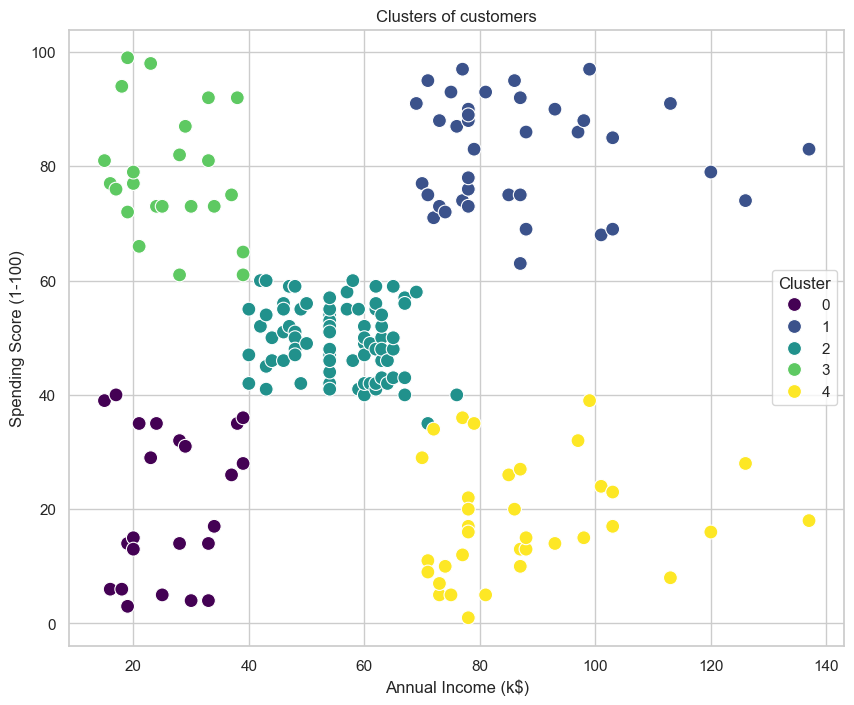

In [47]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers')

# Display the plot
plt.show()

### Customer Segments Based on Age and Spending Score


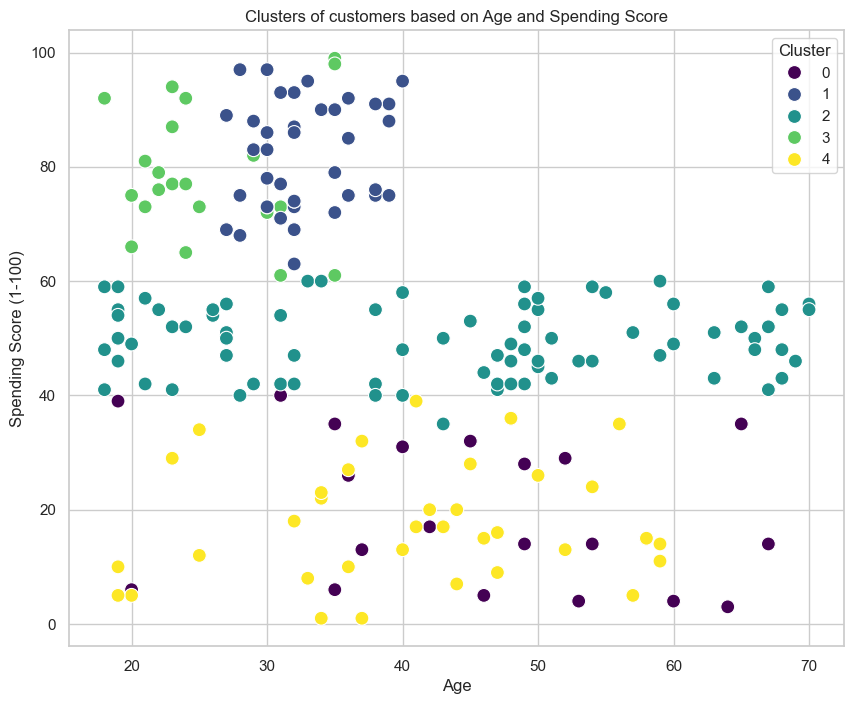

In [48]:
# Create a scatter plot of Age vs Spending Score 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', 
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

### Distribution of Gender within each Cluster

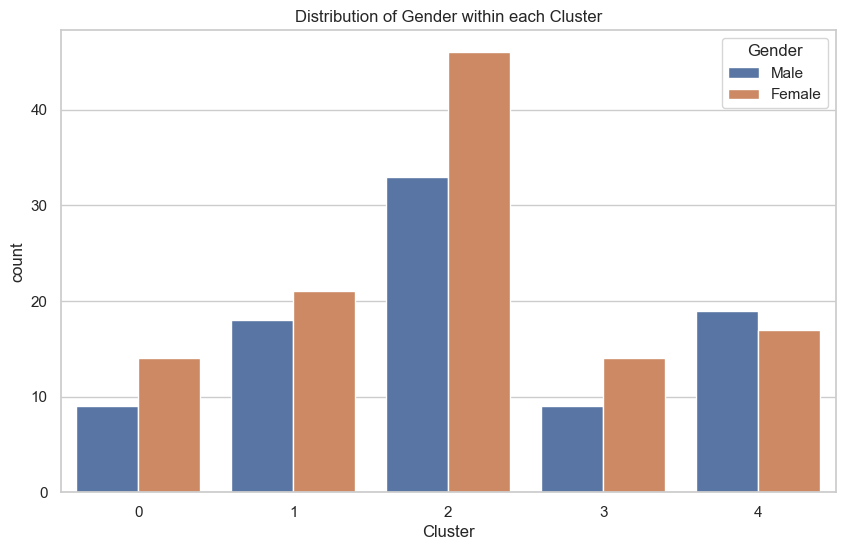

In [49]:
# Create a count plot to show the distribution of 'Gender' within each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')

# Add a title to the plot|
plt.title('Distribution of Gender within each Cluster')

# Display the plot
plt.show()

### Pair plot

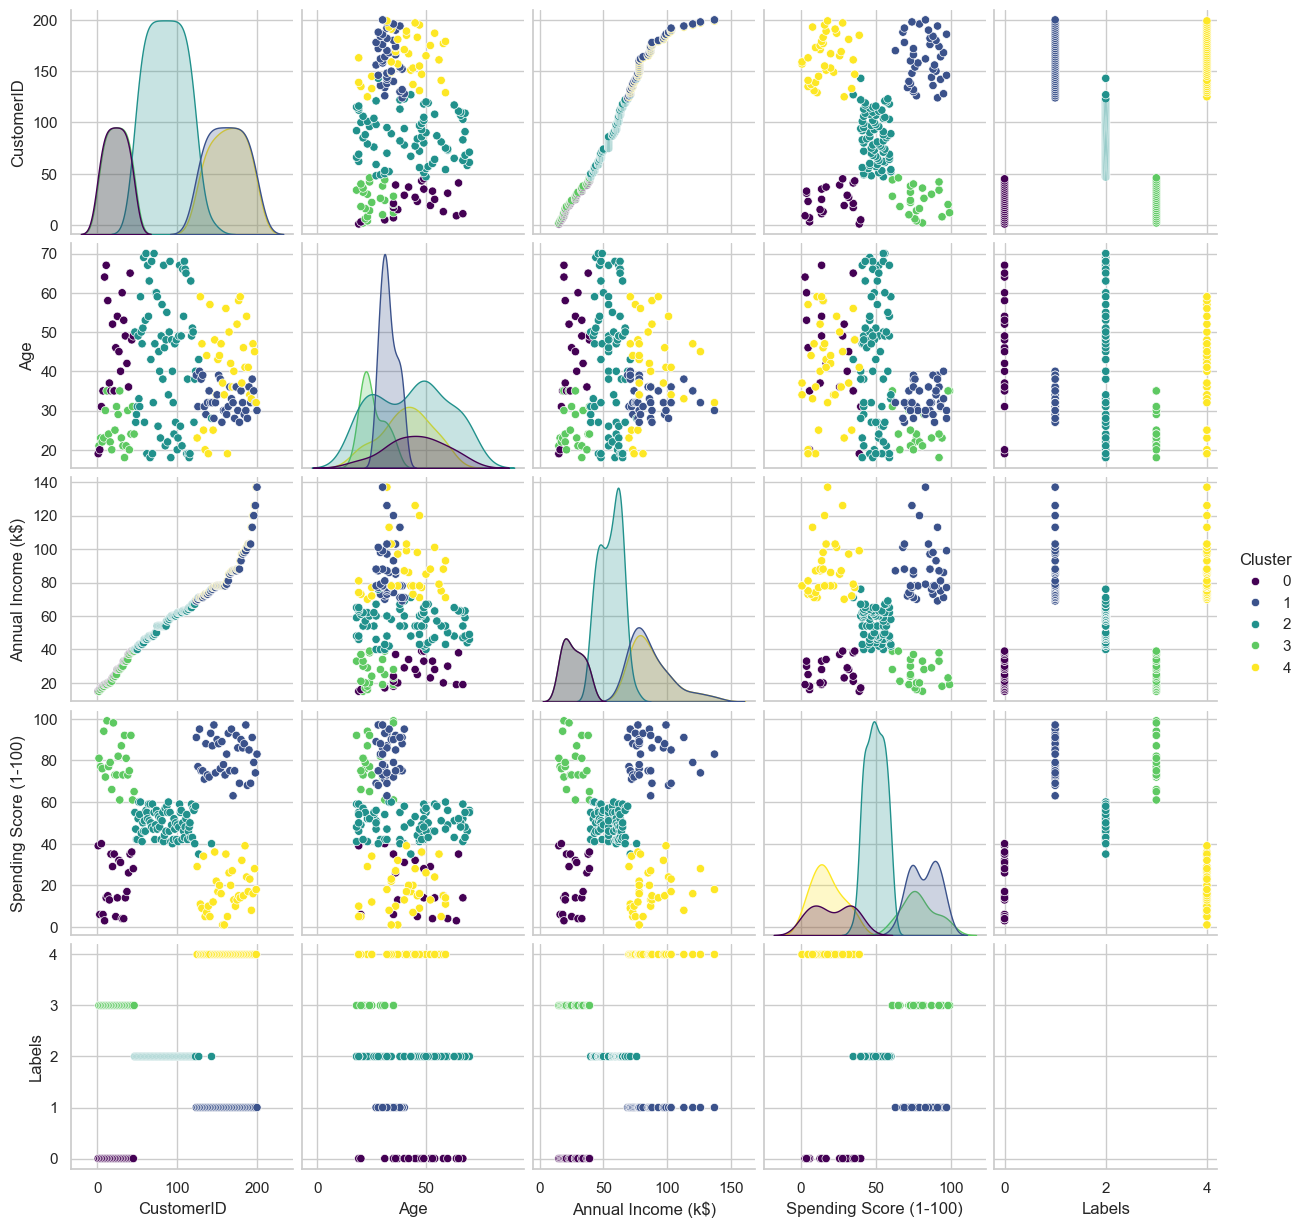

In [55]:
# Create a pairplot for relationships between the different features 
sns.pairplot(df, hue='Cluster', palette='viridis')

# Display the plot
plt.show()

### Box plot

Text(0.5, 1.0, 'Spending Score (1-100)')

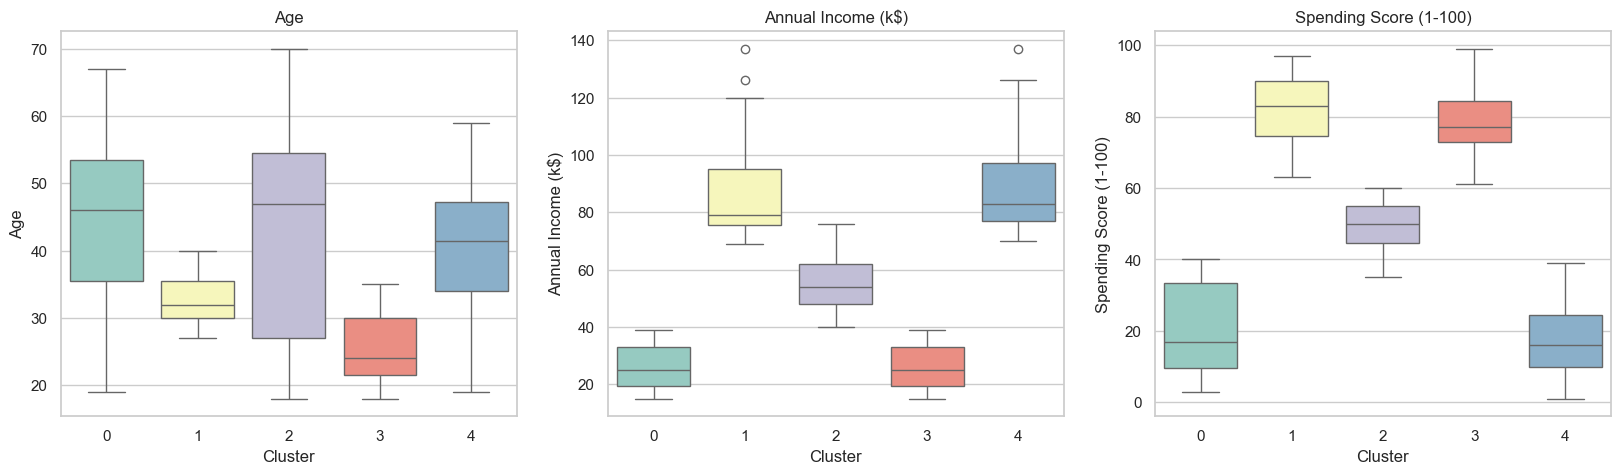

In [63]:

# Create a boxplot for each feature split by 'Cluster'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Set a palette for the clusters
palette = 'Set3'  # You can choose other palettes like 'Set1', 'Set2', 'viridis', etc.

# Boxplot for 'Age'
sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0], hue='Cluster', palette=palette, legend=False)
axs[0].set_title('Age')

# Boxplot for 'Annual Income (k$)'
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1], hue='Cluster', palette=palette, legend=False)
axs[1].set_title('Annual Income (k$)')

# Boxplot for 'Spending Score (1-100)'
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2], hue='Cluster', palette=palette, legend=False)
axs[2].set_title('Spending Score (1-100)')


### Silhouette Score

In [64]:
# Import the necessary libraries
from sklearn.metrics import silhouette_score

# Compute the silhouette score for the clustering
silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])

# Print the silhouette score
print('Silhouette Score: ', silhouette_score)

Silhouette Score:  0.44428597560893024


A silhouette score near 1 indicates high-quality clustering, with datapoints in the same cluster close to each other and far from other clusters.

A score near 0 suggests overlapping clusters, indicating low-quality clustering and a score near -1 suggests datapoints are incorrectly clustered and would fit better in another cluster.

our <b>Silhouette Score = 0.44</b>

<b> which can be improve by potential strategies included: </b>

1. Feature Engineering: Create new features to better capture data structure.

2. Different Clustering Algorithm: Consider alternatives to KMeans, like Hierarchical Clustering, DBSCAN, or Gaussian Mixture Models.

3. Tune KMeans Parameters: Adjust parameters like centroid initialization method or number of iterations.

4. Scaling Features: Scale features to have a mean of 0 and standard deviation of 1, as KMeans is sensitive to feature scale.

5. Increase the Number of Clusters: Try increasing the number of clusters to potentially improve the silhouette score.


In [65]:
# Scaling Features

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

# Create a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the scaled features
kmeans.fit(scaled_features)

# Assign the cluster labels to a new column in the dataframe
df['Scaled_Cluster'] = kmeans.labels_

# Compute the silhouette score for the new clustering
scaled_silhouette_score = silhouette_score(scaled_features, df['Scaled_Cluster'])

# Print the silhouette score
print('Scaled Silhouette Score:', scaled_silhouette_score)

Scaled Silhouette Score: 0.40846873777345605


### Agglomerative Clustering to the scaled features


In [66]:
# Import the necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the AgglomerativeClustering object to the scaled features
agg_clustering.fit(scaled_features)

# Assign the cluster labels to a new column in the dataframe
df['Agg_Cluster'] = agg_clustering.labels_

# Compute the silhouette score for the new clustering
agg_silhouette_score = silhouette_score(scaled_features, df['Agg_Cluster'])

# Print the silhouette score
print('Agglomerative Clustering Silhouette Score: ', agg_silhouette_score)

Agglomerative Clustering Silhouette Score:  0.39002826186267214


### Principal Component Analysis


In [67]:
# Importing the necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Creating a PCA object with two components
pca = PCA(n_components=2)

# Fitting the PCA to the scaled features and transforming them
pca_features = pca.fit_transform(scaled_features)

# Creating a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the KMeans to the PCA features
kmeans.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['PCA_Cluster'] = kmeans.labels_

# Calculating the silhouette score for the new clustering
pca_silhouette_score = silhouette_score(pca_features, df['PCA_Cluster'])

# Printing the silhouette score
print('PCA Silhouette Score: ', pca_silhouette_score)

PCA Silhouette Score:  0.38978616968277185


### DBSCAN 

In [68]:
# Importing the necessary libraries
from sklearn.cluster import DBSCAN

# Creating a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fitting the DBSCAN object to the PCA features
dbscan.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['DBSCAN_Cluster'] = dbscan.labels_

# Calculating the silhouette score for the new clustering
dbscan_silhouette_score = silhouette_score(pca_features, df['DBSCAN_Cluster'])

# Printing the silhouette score
print('DBSCAN Silhouette Score: ', dbscan_silhouette_score)

DBSCAN Silhouette Score:  0.3203118288175695


### Insight

In [85]:
# Group the data by the 'Cluster' column and calculate the max, min, and mean values for each feature
cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg({
    'Age': ['min', 'max', 'mean'],
    'Annual Income (k$)': ['min', 'max', 'mean'],
    'Spending Score (1-100)': ['min', 'max', 'mean']
}).astype(int)

# Create the new column names by concatenating the aggregation function and feature and assign them to the columns
new_column_names = []
for col in cluster_characteristics.columns:
    agg_func, feature = col
    new_column_names.append(f"{agg_func}_{feature}")

# Assign the new column names
cluster_characteristics.columns = new_column_names

In [86]:
cluster_characteristics

,Age_min,Age_max,Age_mean,Annual Income (k$)_min,Annual Income (k$)_max,Annual Income (k$)_mean,Spending Score (1-100)_min,Spending Score (1-100)_max,Spending Score (1-100)_mean
Cluster,,,,,,,,,
0,19,67,45,15,39,26,3,40,20
1,27,40,32,69,137,86,63,97,82
2,18,70,43,40,76,55,35,60,49
3,18,35,25,15,39,26,61,99,78
4,19,59,40,70,137,87,1,39,17


In [88]:
cluster_characteristics.to_csv(r'F:\For work\Data set\cluster_characteristics from mall customer.csv')

## <b>Summary</b>

After applied the Clustering method using K-Mean clustering this is the cluster characteristics for mall customer, this dataset shape consist of 200 datapoint.

<b>Cluster 0:</b>

Age range: 19-67 years old, with a mean age of 45
Annual income range: $15,000 - $39,000, with a mean income of $26,000
Spending score range: 3-40 (out of 100), with a mean score of 20

<font color="red"><b> Middle-aged customers with moderate incomes and relatively low spending scores. They may be budget-conscious or value-oriented shoppers.</b> </font>

<b>Cluster 1:</b>

Age range: 27-40 years old, with a mean age of 32
Annual income range: $69,000 - $137,000, with a mean income of $86,000
Spending score range: 63-97 (out of 100), with a mean score of 82

<font color="blue"><b> Young professionals or affluent millennials with high incomes and high spending scores. They are likely willing to spend more on shopping and may be targeted for luxury or high-end products/services. </b></font>

<b>Cluster 2:</b>

Age range: 18-70 years old, with a mean age of 43
Annual income range: $40,000 - $76,000, with a mean income of $55,000
Spending score range: 35-60 (out of 100), with a mean score of 49

<font color="green"><b> A diverse age group with above-average incomes and moderate spending scores. They may be more selective in their purchases and value quality over quantity. </b></font>

<b>Cluster 3:<b>

Age range: 18-35 years old, with a mean age of 25
Annual income range: $15,000 - $39,000, with a mean income of $26,000
Spending score range: 61-99 (out of 100), with a mean score of 78

<font color="yellow"><b>Young customers with moderate incomes but very high spending scores relative to their income levels. They may be impulse buyers or heavily influenced by trends and brands. </b> </font>

<b>Cluster 4:</b>

Age range: 19-59 years old, with a mean age of 40
Annual income range: $70,000 - $137,000, with a mean income of $87,000
Spending score range: 1-39 (out of 100), with a mean score of 17

<font color="pink"><b>Middle-aged customers with high incomes but low spending scores at the mall. They may prefer spending their disposable income on other categories like travel, dining out, or experiences rather than retail shopping. </b> </font>


<br>
This data provides insights into the age, income, and spending patterns of different customer segments or clusters identified in the mall customer dataset.
</br>

<br>
This is the Observation from Gen AI <u>(Claude3 Sonnet)</u> I Interpret myself and then using a Generative AI to summarize the sample data.
